## Visually exploring data

<!-- TODO rewrite since matplotlib is now beofre seaborn -->
The knowledge of how to make an appealing and informative visualization can be put into practice by working directly with `matplotlib`, and styling different elements of the plot. The high-level figures created by `seaborn` can also be configured via the `matplotlib` parameters, so learning more about them will be very useful.

As demonstrated previously with `FacetGrid`, one way of creating a line plot is by using using the `plot()` function from `matplotlib.pyplot`. To facilitate the understanding of plotting concepts, the initial examples here will not include data frames, but instead have simple lists holding just a few data points.

In [14]:
%matplotlib inline

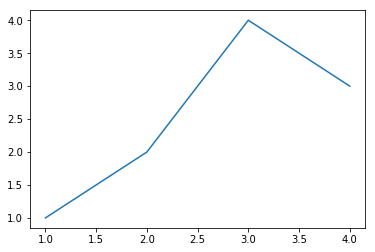

In [15]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 2, 4, 3]
plt.plot(x ,y)

However, this way of plotting is not very explicit and some configuration is outside our control, e.g. a figure is automatically created and it is assumed that the plot should go into the currently active region of this figure. This gives little control over exactly where to place the plots within a figure and how to make modifications the plot after creating it, e.g. adding a title or labeling the axis. For these operations, it is easier to use the object oriented plotting interface, where an empty figure and is created initially. This figure and its axes are assigned to variable names which are then explicitly used for plotting. In `matplotlib`, an axes refers to what you would often call a subplot colloquially and it is named "axes" because it consists of an x-axis and a y-axis by default. By default an empty figure is created.

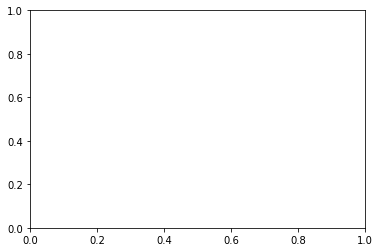

In [16]:
fig, ax = plt.subplots()

Calling `subplots()` returns two objects, the figure and its axes. Plots can be added to the axes of the figure using the name of the returned axes object (here `ax`).

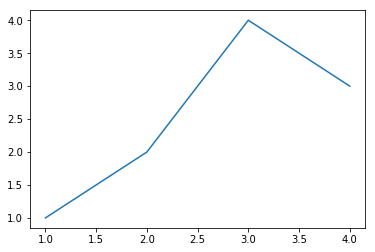

In [17]:
fig, ax = plt.subplots()
ax.plot(x, y)

To create a scatter plot, use `ax.scatter()` instead of `ax.plot()`.

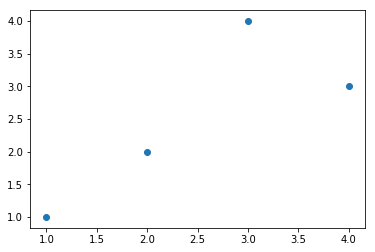

In [18]:
fig, ax = plt.subplots()
ax.scatter(x, y)

Plots can also be combined together in the same axes. The line style and marker color can be changed to facilitate viewing the elements in th combined plot.

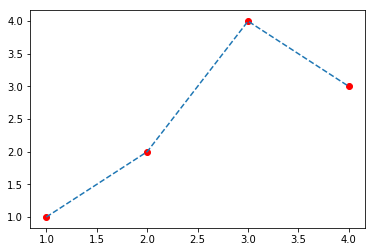

In [19]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red')
ax.plot(x, y, linestyle='dashed')

And plot elements can be resized.

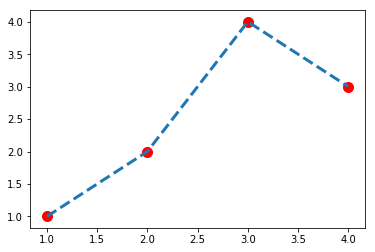

In [20]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red', s=100)
ax.plot(x, y, linestyle='dashed', linewidth=3)

It is common to modify the plot after creating it, e.g. adding a title or label the axis.

Text(0.5,0,'Measurement X')

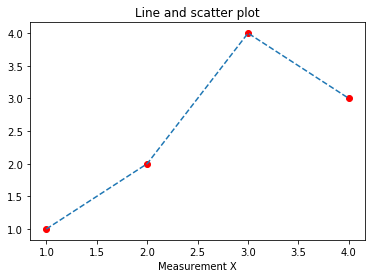

In [21]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red')
ax.plot(x, y, linestyle='dashed')

ax.set_title('Line and scatter plot')
ax.set_xlabel('Measurement X')

The scatter and line plot can easily be separated into two subplots within the same figure. Instead of assigning a single returned axes to `ax`, the two returned axes objects are assigned to `ax1` and `ax2` respectively.

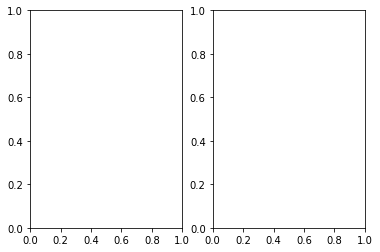

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
# The default is (1, 1), that's why it does not need
# to be specified with only one subplot

To prevent plot elements, such as the axis ticklabels from overlapping, `tight_layout()` method can be used.

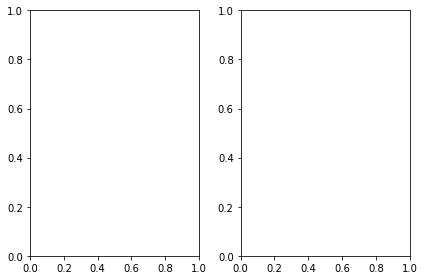

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()

The figure size can easily be controlled when it is created.

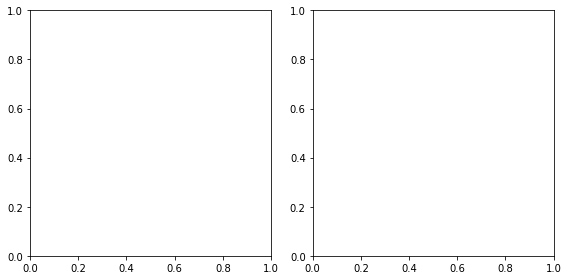

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4)) # This refers to the size of the figure in inches when printed or in a PDF
fig.tight_layout()

Putting it all together to separate the line and scatter plot.

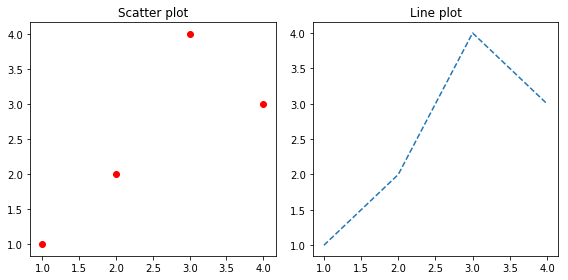

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(x, y, color='red')
ax2.plot(x, y, linestyle='dashed')

ax1.set_title('Scatter plot')
ax2.set_title('Line plot')
fig.tight_layout()

> #### Challenge 2
> 
> 1. There are a plethora of colors available to use in `matplotlib`. Change the color of the line and the dots in the figure using [your favorite color from this list](https://stackoverflow.com/a/37232760/2166823).
> 2. Use the documentation to also change the styling of the line in the line plot and the type of marker used in the scatter plot (you might need to search online for this).

### Saving graphs

Figures can be saved by calling the `savefig()` method and specifying the name of file to create. The resolution of the figure can be controlled by the `dpi` parameter.

In [26]:
fig.savefig('scatter-and-line.png', dpi=300)

A PDF-file can be saved by changing the extension in the specified file name. Since PDF is a vector file format, there is not need to specify the resolution.

In [27]:
fig.savefig('scatter-and-line.pdf')

This concludes the customization section. The concepts taught here will be applied in the next section on how to choose a suitable plot type for data sets with many observations.

## Plotting data frames (quantatative vs quantatative)


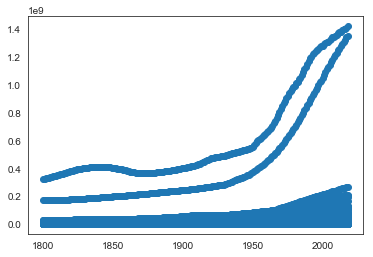

In [456]:
fig, ax = plt.subplots()
ax.scatter(x='year', y='population', data=pop_regions)

Every single dot for every country is not what we wanted, rather the average per year. We could do what we learned previously witth groupby dataframes.

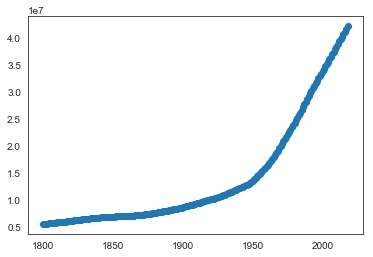

In [465]:
# One could also do `as_index=False` with `groupby()`
mean_pop = pop_regions.groupby('year')['population'].mean().reset_index()
fig, ax = plt.subplots()
ax.scatter(x='year', y='population', data=mean_pop)

While this works, it gets complicated once we want to include more variable, e.g. stratifying the data based on region and income level in the example above would include writing double for loops and keeping track of plot layout and gruoping variables manually.

It would be easier to just say what we want and this is where Seaborn is good.

## Data visualization in `matplotlib` and `seaborn`

<!-- TODO slight rewrite to reflect new order -->
There are many plotting packages in Python, making it possible to create diverse visualizations such as interactive web graphics, 3D animations, statistical visualizations, and map-based plots. A Google search for "[Python graph gallery](https://python-graph-gallery.com/all-charts/)" or "[Seaborn graph gallery](https://seaborn.pydata.org/examples/)" will turn up lots of examples of the diversity of plots that can be made.

Here, we will focus on two of the most useful for researchers: `matplotlib`, which is a robust, detail-oriented, low level plotting interface, and `seaborn`, which provides high level functions on top of `matplotlib` and allows the plotting calls to be expressed more in terms what is being explored in the underlying data rather than what graphical elements to add to the plot.

Instead of instructing the computer to "go through a data frame and plot any observations of speciesX in blue, any observations of speciesY in red, etc", the `seaborn` syntax is more similar to saying "color the data by species". Thanks to this functional way of interfacing with data, only minimal changes are required if the underlying data change or to switch the type of plot used for the visualization. It provides a language that facilitates thinking about data in ways that are conducive for exploratory analysis and allows for the creation of publication quality plots with minimal adjustments and tweaking.

The concepts of plotting with `seaborn` were introduced briefly already in the first lecture. To make a plot of the number of observations for each species, first import the library and then use the `countplot()` function. Before the first plot is created, the line `%matplotlib inline` is used to specify that all plots should show up in the notebook instead of in a separate window.

By default, seaborn lineplot takes the mean

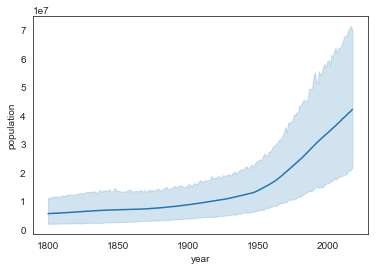

In [490]:
# The `estimator` parameter is currently non-functional for
# scatterplot so need to do lineplot right away
sns.lineplot(x='year', y='population', data=pop_regions)

In this case, it would be more appropriate to have the shaded area describe the variaiton in the data rather than inference about the reproducilibty. The shaded area can be changed to standard deviation.

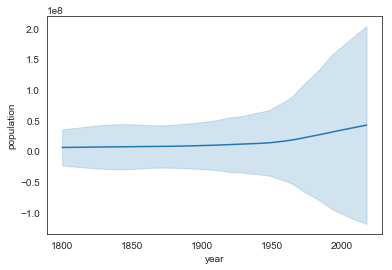

In [494]:
# TODO Maybe remove, looks weird
sns.lineplot(x='year', y='population', data=pop_regions, ci='sd')

Or removed completely.

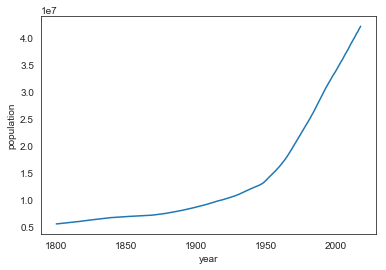

In [492]:
sns.lineplot(x='year', y='population', data=pop_regions, ci=None)

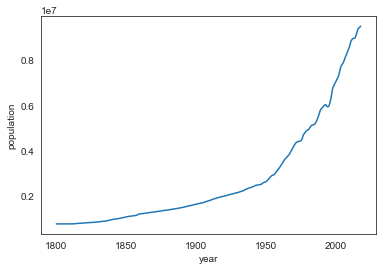

In [506]:
sns.lineplot(x='year', y='population', data=pop_regions, estimator='median', ci=None)

The returned object is matplotlib axis, so everything we now about matplotlib can be applied by assigning the returned object to avariable name and configure it

Text(0.5,0,'Year')

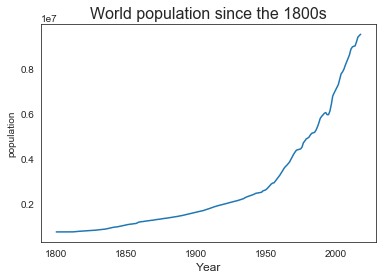

In [503]:
ax = sns.lineplot(x='year', y='population', data=pop_regions, estimator='median', ci=None)
ax.set_title('World population since the 1800s', fontsize=16)
ax.set_xlabel('Year', fontsize=12)

# Styling

A more effective approach than setting individual font sizes or colors of graphical elemnts is to set the overall size and style through seaborn.

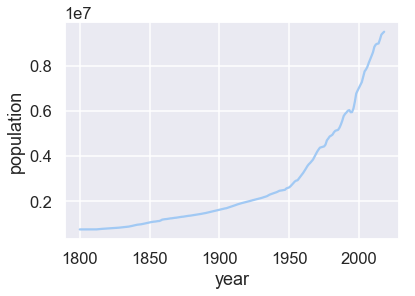

In [510]:
# TODO in general, be sure to link seaborn documentation
sns.set(context='talk', style='darkgrid', palette='pastel')
sns.lineplot(x='year', y='population', data=pop_regions, estimator='median', ci=None)

These functions are like changing the settings in aprogram and will apply to all folowing plots. 

**Challenge** Which styles and context are available? Choose your favorite style and let's continue.

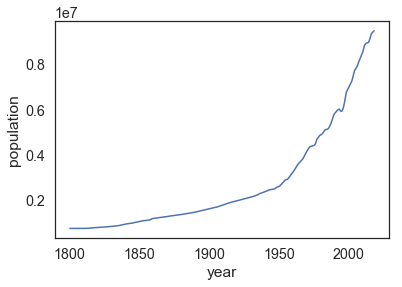

In [586]:
sns.set(context='notebook', style='white', font_scale=1.3)
sns.lineplot(x='year', y='population', data=pop_regions, estimator='median', ci=None)

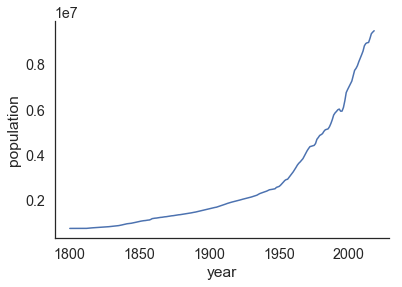

In [587]:
sns.lineplot(x='year', y='population', data=pop_regions, estimator='median', ci=None)
sns.despine()

As mentioned above, the strenght of descrptive plotting is being able to tell the plot in human terms what you want rather than looping over and coloring individual plot elelemnts.

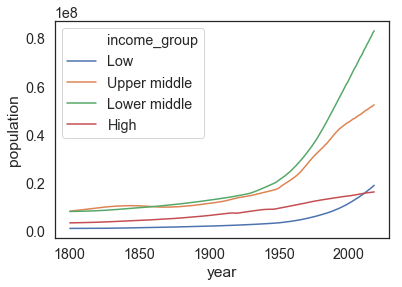

In [588]:
sns.lineplot(x='year', y='population', data=pop_regions,
             hue='income_group', ci=None)

Accessibility can be increased for readers that can't discern color well through the `style` parameter.

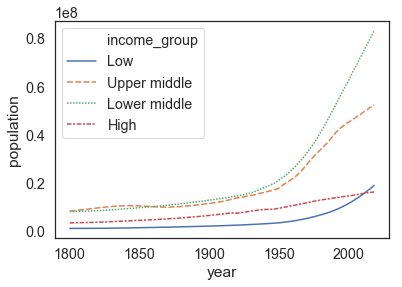

In [589]:
sns.lineplot(x='year', y='population', data=pop_regions,
             hue='income_group', style='income_group', ci=None)

If we want to compare two columns/variables side by side, we can combine matplotlibs figure layout with seaborns plot types.

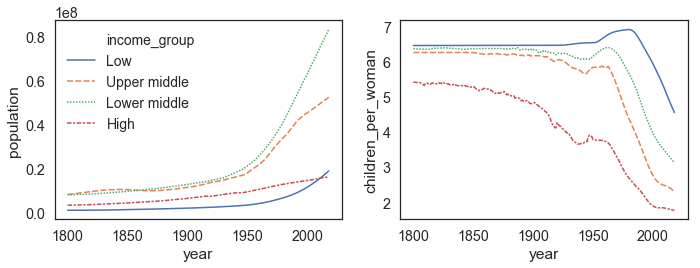

In [590]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.lineplot(x='year', y='population', data=pop_regions, ci=None,
            hue='income_group', style='income_group', ax=ax1)
# TODO not sure on how to remove the searborn legend title since it is not controlled
# via the legend's title parameter
ax1.legend(fontsize=14, frameon=False)

sns.lineplot(x='year', y='children_per_woman', data=pop_regions, ci=None,
            hue='income_group', style='income_group', ax=ax2, legend=False)

fig.tight_layout()

More commonly when doing EDA, we want to look within one columns and compare through multiple gruopings with other variables. Seaborn has very good bulint-in functionality via smlal multiple grids.

The above is useful to compare between two columns in a dataframe. This When performing exploratory data analysis, it is common to want to explore the relationship of values within one columns conditioned on variables in other columns.

<!-- TODO clean up -->
It is difficult to explore multiple categorical relationships within one single plot. It is often easier to use small multiple or fates.

A very effective approach for exploring multiple categorical variables in a data set is to plot so-called "small multiples" of the data, where the same type of plot is used for different subsets of the data. These plots are drawn in rows and columns forming a grid pattern, and can be referred to as a "lattice", "facet", or "trellis" plot.

Visualizing categorical variables in this manner is a key step in exploratory data analysis, and thus `seaborn` has a dedicated plot function for this, called `relplot()` (for "relational plot" since it viusalizes the rlationships between two numerical varibles).

Same as before

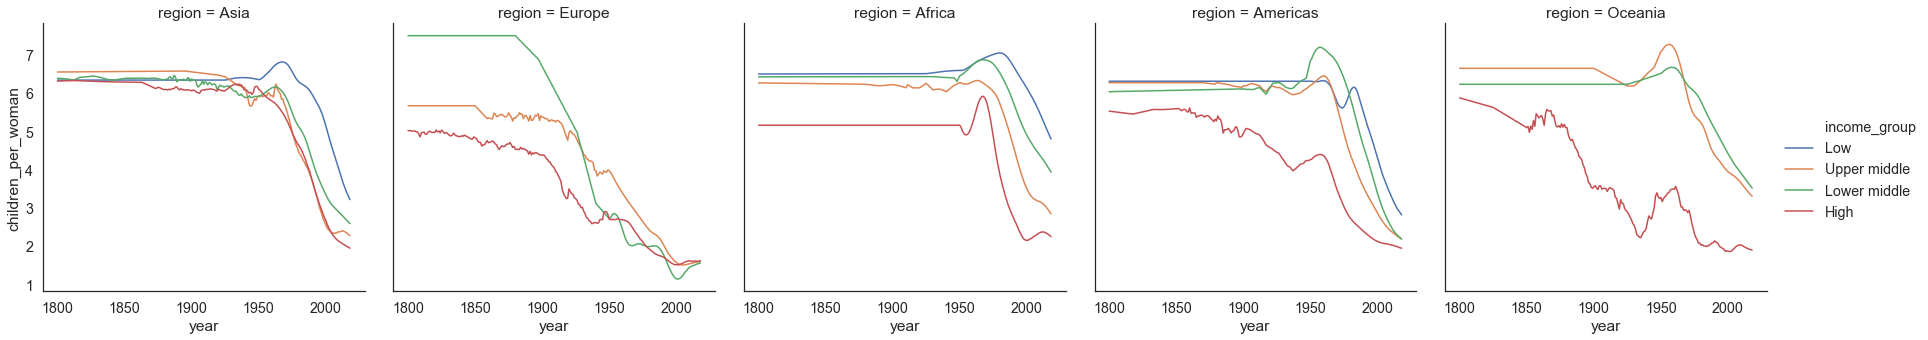

In [596]:
# relplot has the kinds scatter and line
sns.relplot(x='year', y='children_per_woman', data=pop_regions,
            kind='line', hue='income_group', col='region', ci=None)

Hard to see becuse the figure is much bigger than the plot and shrunk to fit, fix that by changing aesthetics.

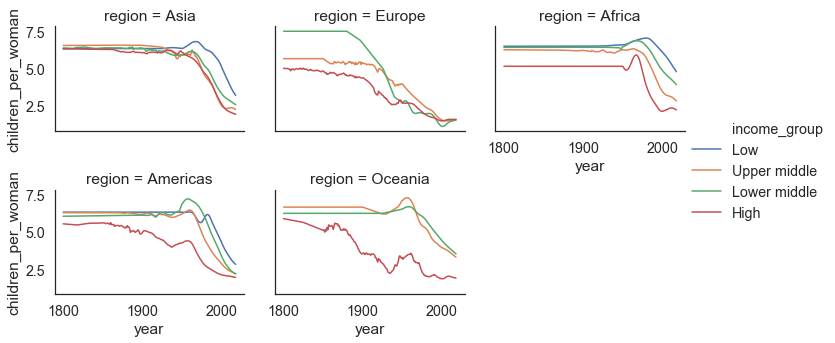

In [604]:
sns.relplot(x='year', y='children_per_woman', data=pop_regions,
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3, height=2.5, aspect=1.3)

The return object is a grid (figure subset) and can therefore not be placed in another fig as before. It is saved just as any matplotlib figure, but has some special methods for easily changing plot lables, titles, and more. Remember that names such as `fig`, `ax`, and here `g` are only by convention, and any variable name could have been used.

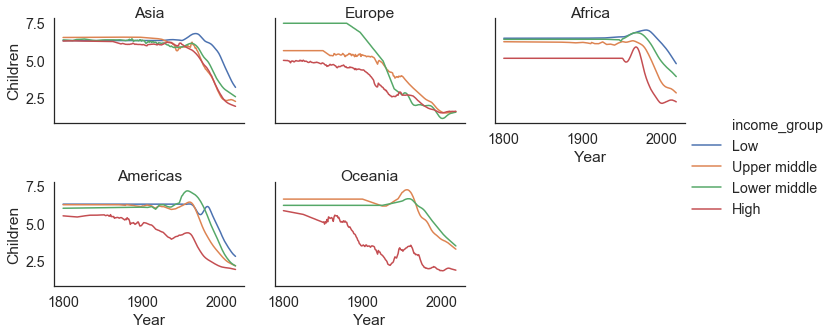

In [696]:
g = sns.relplot(x='year', y='children_per_woman', data=pop_regions,
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3, height=2.5, aspect=1.3)
g.set_titles('{col_name}', y=0.95)
g.set_axis_labels(y_var='Children', x_var='Year')
g.savefig('grid-figure.png')

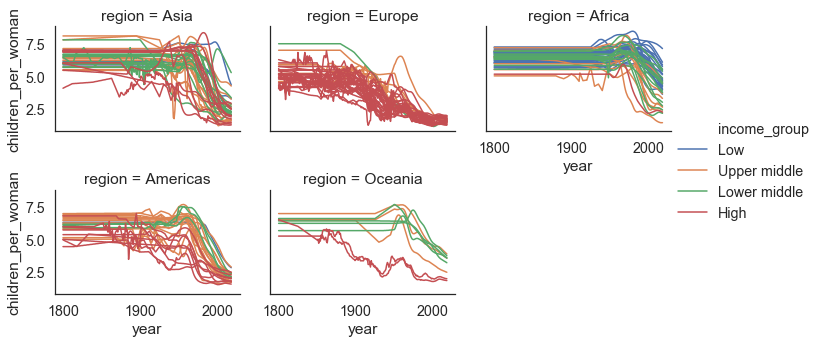

In [607]:
# TODO include units parameter somwehere, but not here because it is not too pretty...
sns.relplot(x='year', y='children_per_woman', data=pop_regions,
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3, height=2.5, aspect=1.3, units='country', estimator=None)

The other type of plot that explores the relationship between two variables is the scatter plot. This is the default in the  `relplot()` function.

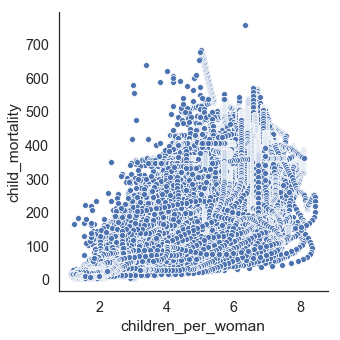

In [605]:
sns.relplot(x='children_per_woman', y='child_mortality', data=pop_regions)

This does not look quite as expected, the reason is that we have plotted multiple occurences per country, one for each year. This is probably not what we want and we can filter to avoid.

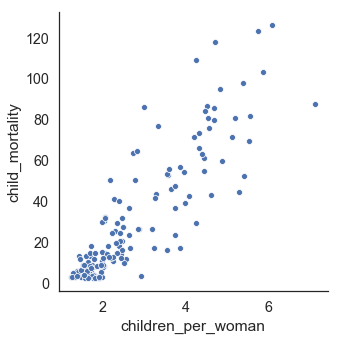

In [611]:
sns.relplot(x='children_per_woman', y='child_mortality',
            data=pop_regions.loc[pop_regions['year'] == 2018])

Now there appears to be a quite strong relationship. Just like before, this can be easily explored by grouping by the other variables

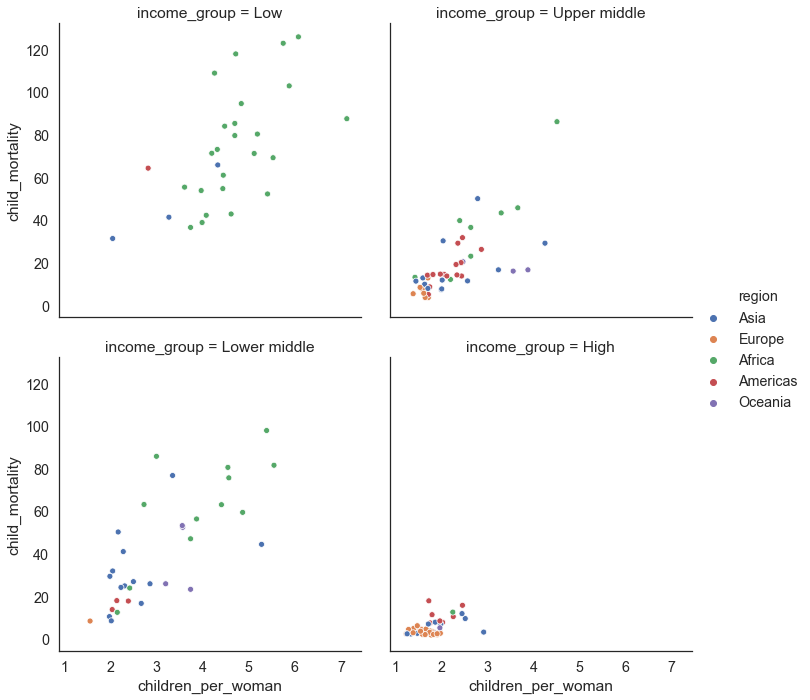

In [622]:
sns.relplot(x='children_per_woman', y='child_mortality', col='income_group', hue='region',
            data=pop_regions.loc[pop_regions['year'] == 2018], col_wrap=2, )

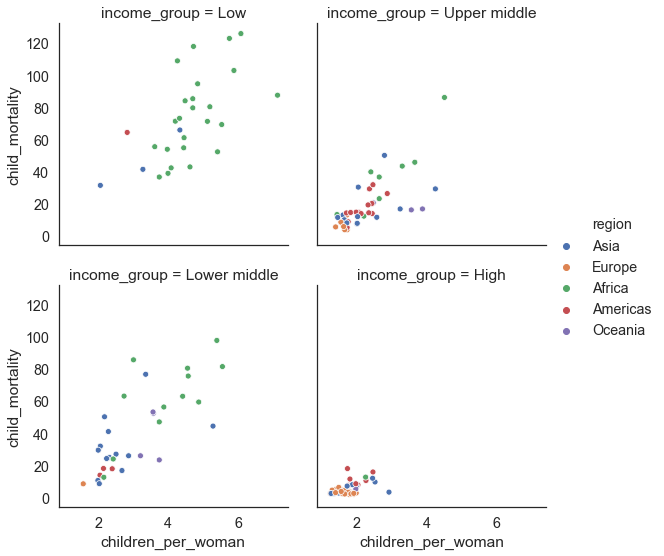

In [621]:
sns.relplot(x='children_per_woman', y='child_mortality', col='income_group', hue='region',
            data=pop_regions.loc[pop_regions['year'] == 2018], col_wrap=2, height=4)

An interesting thing we could do here is select data from more than one year and then use year as a categorical variable

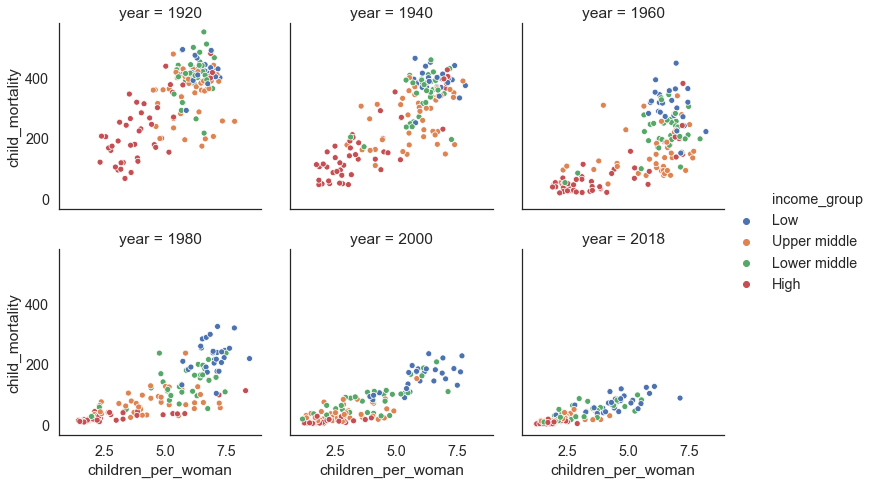

In [861]:
pop_mult_years = pop_regions.loc[pop_regions['year'].isin([1920, 1940, 1960, 1980, 2000, 2018])]
                                 
sns.relplot(x='children_per_woman', y='child_mortality', col='year', hue='income_group',
            data=pop_mult_years, col_wrap=3, height=3.5)

It is clear that there is a relationship between these three variables, but remember that income level is the 2018 status. So in 1920 those red dots did not have high income. To see economic sstatus at the time, we can use the income reported for that time.

<!-- TODO in dataaset description, emphasize that income groups are 2018 levels -->

The hue can be changed to a quantitatitive instead of categorical variable and will be a continueous instead of discerete color map.

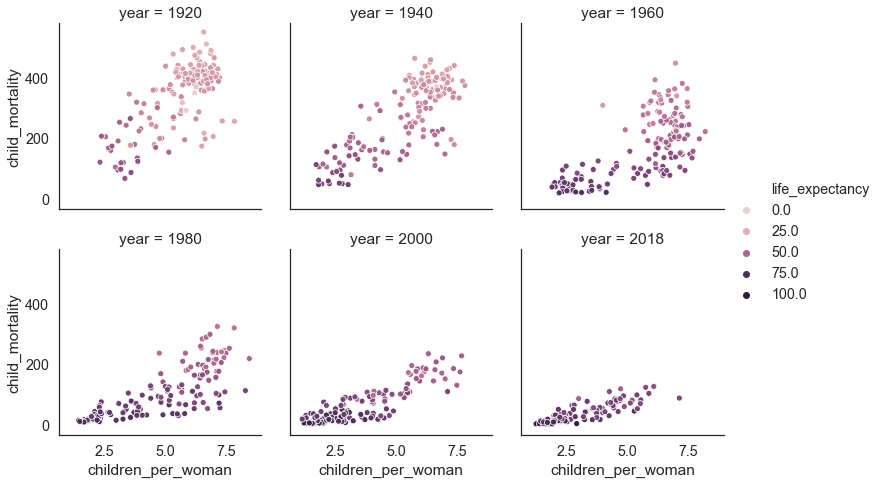

In [641]:
sns.relplot(x='children_per_woman', y='child_mortality', col='year', hue='life_expectancy',
            data=pop_mult_years, col_wrap=3, height=3.5)

To accentuate the hue and help for people with color impaired vision, the hue and size parameter can be set to the same variable. The hue can be changed to any [matplotlib heatmat]() <!--TODO add link --> via the palette keyword.

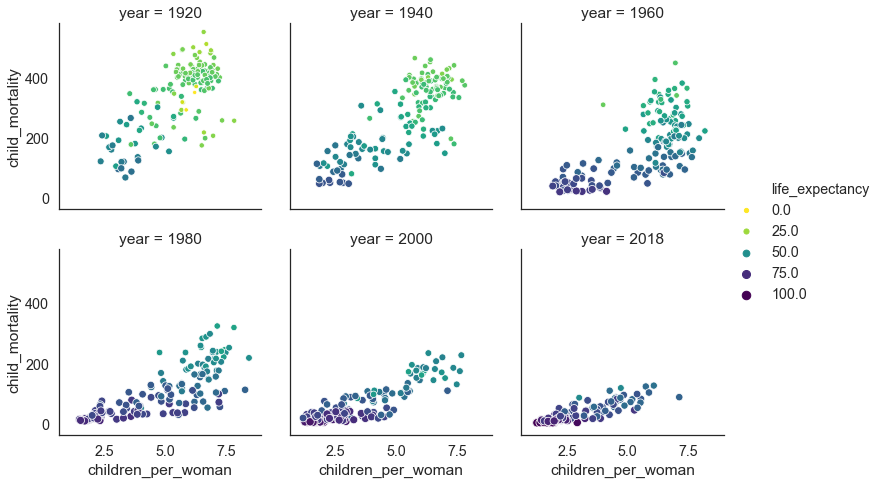

In [642]:
sns.relplot(x='children_per_woman', y='child_mortality', col='year', hue='life_expectancy',
            data=pop_mult_years, col_wrap=3, height=3.5, palette='viridis_r', size='life_expectancy')

In these exercises we chose a suitable place of where to start in order to illustrate these plotting concepts. Often when doing EDA, it will not be as easy to know what comparison to start out with. Unless you have good reason for choosing to look at a particular relationship, starting by plotting the pairwise relationships of all quantitative variables can be very helpful.

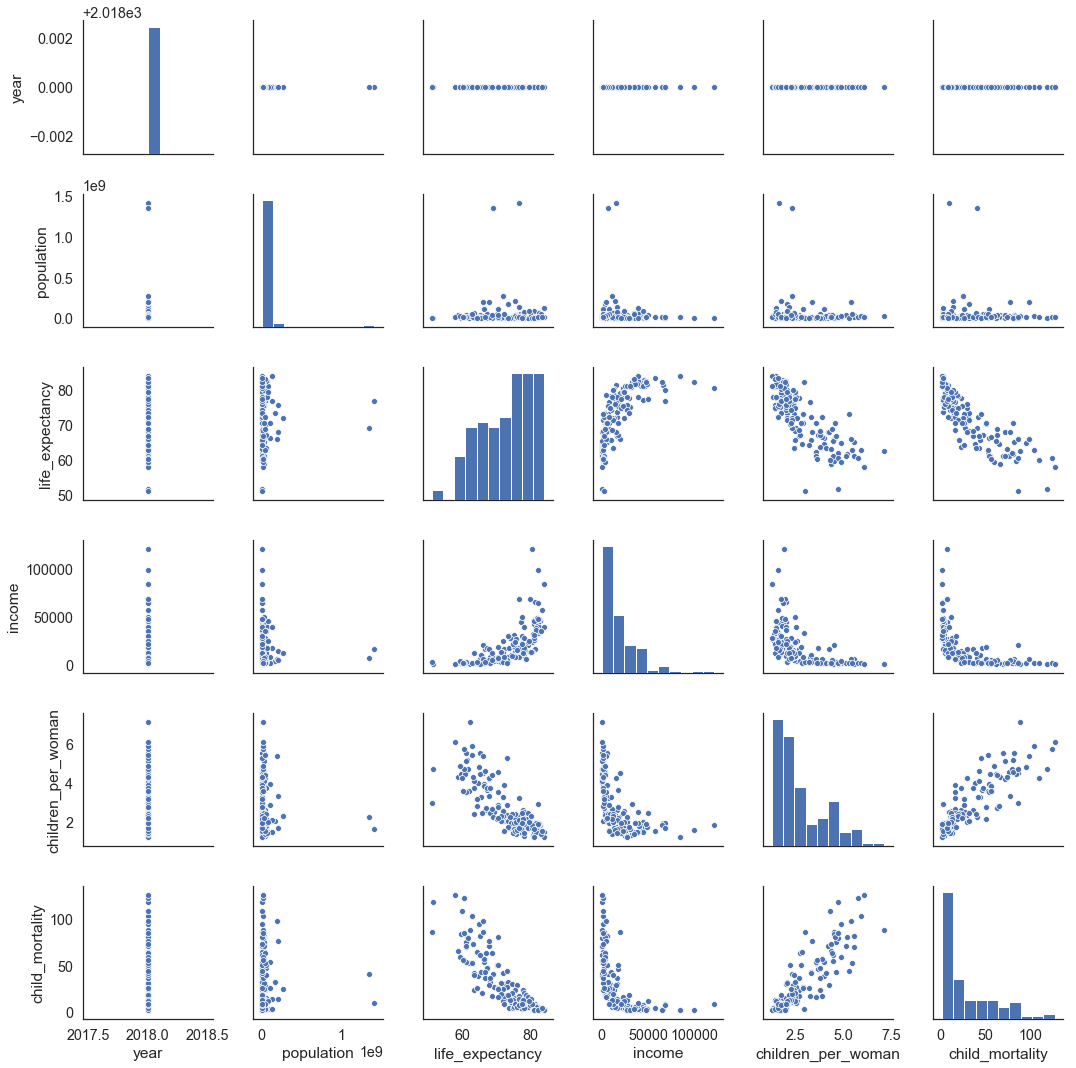

In [647]:
# Subset year to easier see relationship
pop_reg_2018 = pop_regions.loc[pop_regions['year'] == 2018]
sns.pairplot(pop_reg_2018)

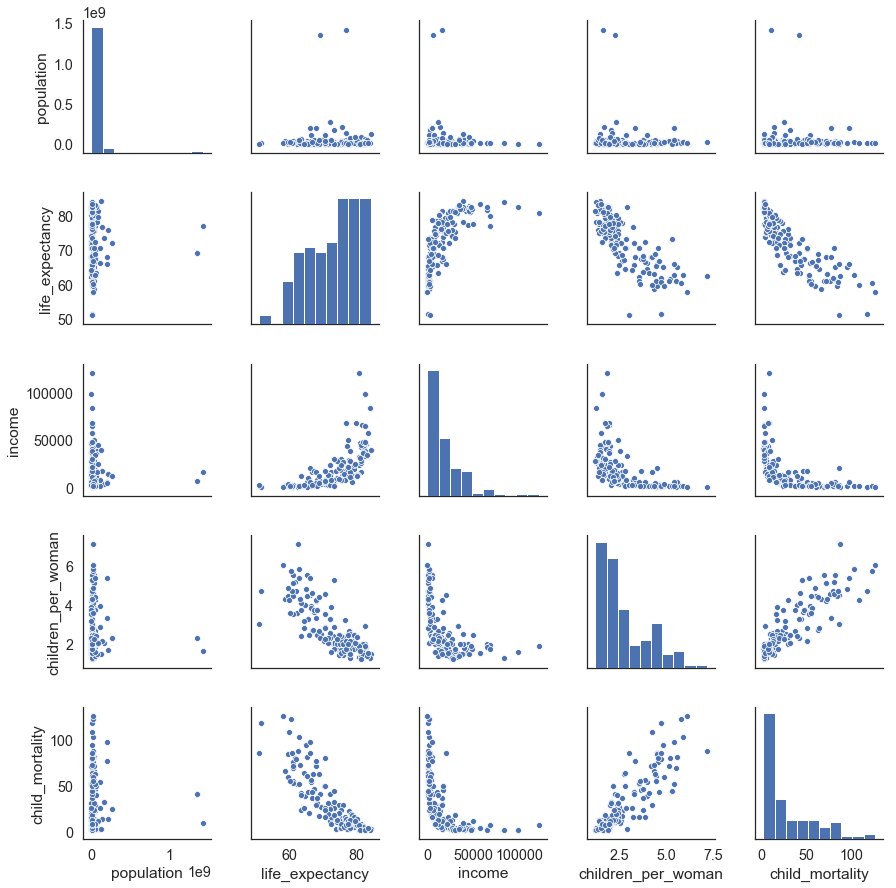

In [649]:
# Drop year column which is not that useful
sns.pairplot(pop_reg_2018.drop('year', axis=1))

*describe graph, upper mirror lower, histo etc*

There are clearly some very interesting relationships here. Can look more formally by finding out the correlation coeffiecinet (pearson R by default)

In [687]:
pop_reg_2018.corr()

,year,population,life_expectancy,income,children_per_woman,child_mortality
year,NaN,NaN,NaN,NaN,NaN,NaN
population,NaN,1.000000,0.004044,-0.064891,-0.063777,0.003577
life_expectancy,NaN,0.004044,1.000000,0.674777,-0.800990,-0.860921
income,NaN,-0.064891,0.674777,1.000000,-0.544940,-0.566530
children_per_woman,NaN,-0.063777,-0.800990,-0.544940,1.000000,0.874784
child_mortality,NaN,0.003577,-0.860921,-0.566530,0.874784,1.000000


Let's zoom in on the relationship between income and lifeexpaectancy that looks pretty strong

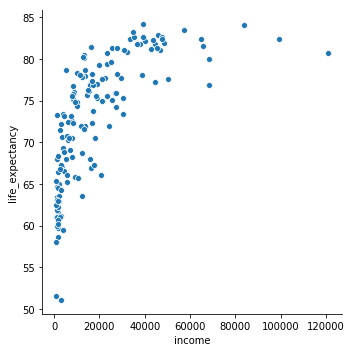

In [333]:
sns.relplot(x='income', y='life_expectancy', data=pop_reg_2018)

The relationship appears to be log linear.

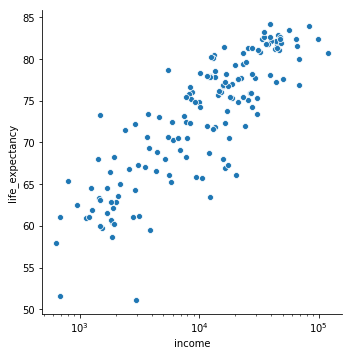

In [345]:
# Explain that a grid is returned before this
g = sns.relplot(x='income', y='life_expectancy', data=pop_reg_2018)
g.ax.set_xscale('log')

Coloring by regions shows a clear distribution

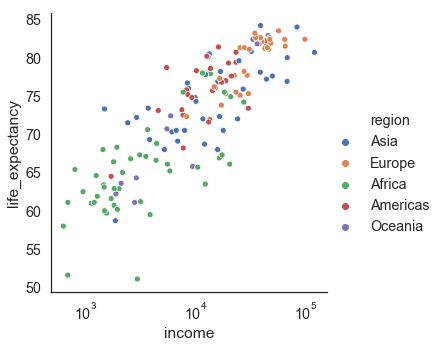

In [657]:
# size and style introduce at some point
g = sns.relplot(x='income', y='life_expectancy', hue='region', data=pop_reg_2018)
g.ax.set_xscale('log')

In [660]:
pop_regions.head()

,country,year,population,region,sub-region,income_group,life_expectancy,income,children_per_woman,child_mortality
0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0
1,Afghanistan,1801,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0
2,Afghanistan,1802,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0
3,Afghanistan,1803,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0
4,Afghanistan,1804,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0


Interestingly, we could have done this already in the pairplot

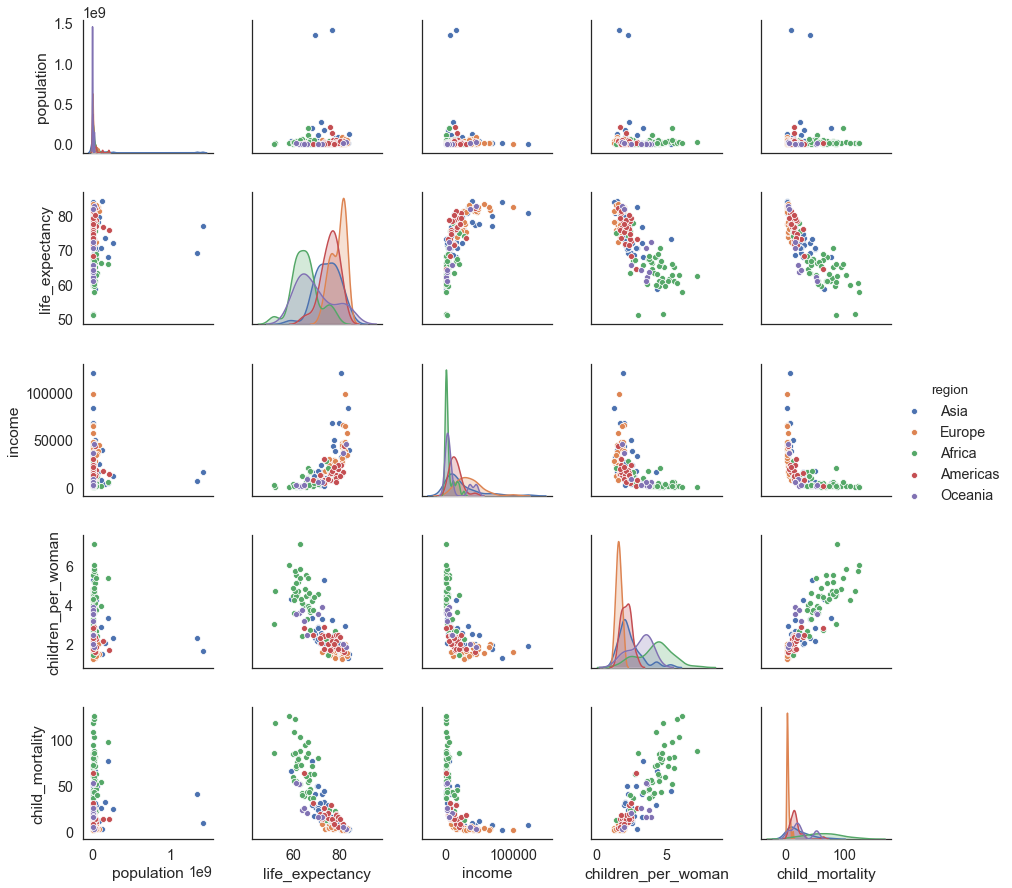

In [650]:
sns.pairplot(pop_reg_2018.drop('year', axis=1), hue='region')

But that looks a bit clutererd, so pairplots are often best used as overview plots.

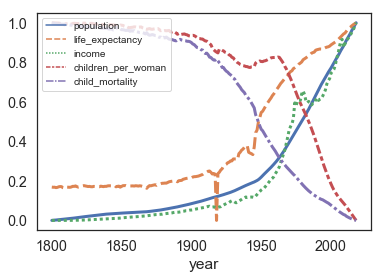

In [684]:
# TODO maybe include this in advanced, it is useful to see where the lines meet
# and if trends start at the same year for different variables.
pop_num = pop_regions.set_index('year')[[
    'population', 'life_expectancy', 'income',
    'children_per_woman', 'child_mortality']]
year_mean = pop_num.groupby('year').mean() 
pop_num_norm = (year_mean - year_mean.min()) / (year_mean.max() - year_mean.min())

ax = sns.lineplot(data=pop_num_norm, ci=None, lw=3)
ax.legend(fontsize=10, loc='upper left')


With facetting into small laticces.

Although populations are currently rising mor erapid than ever, the number of children per woman is  also on an all time low. Current estimation belives the word population will stabilize around 11 billion ppl and the children per woman will be close to 2 worldwide in 2100.

Style can also be used

But trying to encode to many variables gets messy.

In [283]:
import pandas as pd

In [707]:
population = pd.read_csv('../data/population_total.csv')
pop_melt = population.melt(id_vars='geo', var_name='year', value_name='population')
pop_melt['year'] = pop_melt['year'].astype(int)
pop_melt = pop_melt.rename(columns={'geo': 'country'})
# pop_melt = pop_melt.loc[pop_melt['year'] > 1899] # maybe no need to include the 1800s
pop_melt.head()

,country,year,population
0,Afghanistan,1800,3280000
1,Albania,1800,410000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000


In [708]:
# children born per woman
children_born = pd.read_csv('../data/children_per_woman_total_fertility.csv')
children_born_melt = children_born.melt(id_vars='geo', var_name='year', value_name='children_per_woman')
children_born_melt['year'] = children_born_melt['year'].astype(int)
children_born_melt = children_born_melt.rename(columns={'geo': 'country'})
# children_born_melt = children_born_melt.loc[children_born_melt['year'] > 1899] # maybe no need to include the 1800s
children_born_melt.head()

,country,year,children_per_woman
0,Afghanistan,1800,7.00
1,Albania,1800,4.60
2,Algeria,1800,6.99
3,Angola,1800,6.93
4,Antigua and Barbuda,1800,5.00


In [709]:
# child mortality = 0-5 years olds deaths per 1000 newborns
child_mort = pd.read_csv('../data/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
child_mort_melt = child_mort.melt(id_vars='geo', var_name='year', value_name='child_mortality')
child_mort_melt['year'] = child_mort_melt['year'].astype(int)
child_mort_melt = child_mort_melt.rename(columns={'geo': 'country'})
# child_mort_melt = child_mort_melt.loc[child_mort_melt['year'] > 1899] # maybe no need to include the 1800s
child_mort_melt.head()

,country,year,child_mortality
0,Afghanistan,1800,469.0
1,Albania,1800,375.0
2,Algeria,1800,460.0
3,Andorra,1800,NaN
4,Angola,1800,486.0


In [710]:
# CO2 emissions (tonne per person?)
co2 = pd.read_csv('../data/co2_emissions_tonnes_per_person.csv')
co2_melt = co2.melt(id_vars='geo', var_name='year', value_name='co2_emissions')
co2_melt['year'] = co2_melt['year'].astype(int)
co2_melt = co2_melt.rename(columns={'geo': 'country'})
# co2_melt = co2_melt.loc[co2_melt['year'] > 1899] # maybe no need to include the 1800s
co2_melt.head()

,country,year,co2_emissions
0,Afghanistan,1800,NaN
1,Albania,1800,NaN
2,Algeria,1800,NaN
3,Andorra,1800,NaN
4,Angola,1800,NaN


In [711]:
# Pop density
pop_dens = pd.read_csv('../data/population_density_per_square_km.csv')
pop_dens_melt = pop_dens.melt(id_vars='geo', var_name='year', value_name='pop_density')
pop_dens_melt['year'] = pop_dens_melt['year'].astype(int)
pop_dens_melt = pop_dens_melt.rename(columns={'geo': 'country'})
# pop_dens_melt = pop_dens_melt.loc[pop_dens_melt['year'] > 1899] # maybe no need to include the 1800s
pop_dens_melt.head()

,country,year,pop_density
0,Afghanistan,1950,11.90
1,Albania,1950,46.10
2,Algeria,1950,3.73
3,Andorra,1950,13.20
4,Angola,1950,3.65


In [712]:
life_exp = pd.read_csv('../data/life_expectancy_years.csv')
life_exp_melt = life_exp.melt(id_vars='geo', var_name='year', value_name='life_expectancy')
life_exp_melt['year'] = life_exp_melt['year'].astype(int)
life_exp_melt = life_exp_melt.rename(columns={'geo': 'country'})

life_exp_melt.head()

,country,year,life_expectancy
0,Afghanistan,1800,28.2
1,Albania,1800,35.4
2,Algeria,1800,28.8
3,Andorra,1800,NaN
4,Angola,1800,27.0


In [713]:
income = pd.read_csv('../data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income_melt = income.melt(id_vars='geo', var_name='year', value_name='income')
income_melt['year'] = income_melt['year'].astype(int)
income_melt = income_melt.rename(columns={'geo': 'country'})

income_melt.head()

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618


In [714]:
# temp_df['Income group'] = temp_df['Income group'].str.rpartition()[0]
# temp_df.drop('X', axis=1).to_csv('../data/income-group.csv', index=False)
income_group = pd.read_csv('../data/income-group.csv')
income_group = income_group.rename(columns={'Economy': 'country', 'Income group': 'income_group'})
income_group.head()

,country,Code,Region,income_group
0,Afghanistan,AFG,South Asia,Low
1,Albania,ALB,Europe & Central Asia,Upper middle
2,Algeria,DZA,Middle East & North Africa,Upper middle
3,American Samoa,ASM,East Asia & Pacific,Upper middle
4,Andorra,AND,Europe & Central Asia,High


In [715]:
country_regions = pd.read_csv('../data/countries-regions.csv')
country_regions = country_regions.rename(columns={'name': 'country'})
country_regions.head()

,country,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [743]:
# TODO change name to world_data
pop_regions = pd.merge(pop_melt, country_regions[['country', 'region', 'sub-region']], on='country')
pop_regions = pd.merge(pop_regions, income_group[['country', 'income_group']], on=['country'])
pop_regions = pd.merge(pop_regions, life_exp_melt, on=['country', 'year'])
pop_regions = pd.merge(pop_regions, income_melt, on=['country', 'year'])
pop_regions = pd.merge(pop_regions, children_born_melt, on=['country', 'year'])
pop_regions = pd.merge(pop_regions, child_mort_melt, on=['country', 'year'])
pop_regions = pd.merge(pop_regions, pop_dens_melt, on=['country', 'year'], how='left')
pop_regions = pd.merge(pop_regions, co2_melt, on=['country', 'year'], how='left')
pop_regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33288 entries, 0 to 33287
Data columns (total 12 columns):
country               33288 non-null object
year                  33288 non-null int64
population            33288 non-null int64
region                33288 non-null object
sub-region            33288 non-null object
income_group          33288 non-null object
life_expectancy       33288 non-null float64
income                33288 non-null int64
children_per_woman    33288 non-null float64
child_mortality       33288 non-null float64
pop_density           10488 non-null float64
co2_emissions         13672 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 3.3+ MB


Easy first plot, the worlds income distribution.

- Categorical
    - Distributions
    - Measure of central tendency

In [745]:
# filter these in the previous lecture
pop_reg_2018 = pop_regions.loc[pop_regions['year'] == 2018]
pop_reg_2018.loc[~pop_reg_2018['life_expectancy'].isna()]
# pop_reg_2018 = pop_reg_2018.dropna()
pop_reg_2018.head()

,country,year,population,region,sub-region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_emissions
218,Afghanistan,2018,36400000,Asia,Southern Asia,Low,58.7,1870,4.33,65.90,55.7,NaN
437,Albania,2018,2930000,Europe,Southern Europe,Upper middle,78.0,12400,1.71,12.90,107.0,NaN
656,Algeria,2018,42000000,Africa,Northern Africa,Upper middle,77.9,13700,2.64,23.10,17.6,NaN
875,Angola,2018,30800000,Africa,Sub-Saharan Africa,Lower middle,65.2,5850,5.55,81.60,24.7,NaN
1094,Antigua and Barbuda,2018,103000,Americas,Latin America and the Caribbean,High,77.6,21000,2.03,7.89,234.0,NaN


# Quantiative variables within and between distributions of categorical (Distributions and distribution statistics)

Aside from comparing quantitative variable against each other, EDA often involves exploring the distribution of data points within a categorical value or comparing between categories. 

A good place to start visualizing distribution is `distplot()`, which offers three different distribution visualizations.

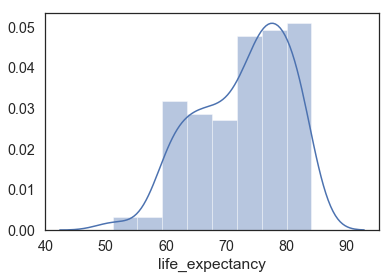

In [746]:
sns.distplot(pop_reg_2018['life_expectancy'])

The line is a kdeplot, as seen previously in the pairplot. This can be taught of as a smoothened histogram. Technically, each data point is plotted as a kernel of a choosen distribution, and where the kernels overlap their height will be added to finally determine the height of the line in the KDE plot <!-- TODO link to seaborn doc -->. For example, a KDE fitted with a square kernel would look similar to a histogram.

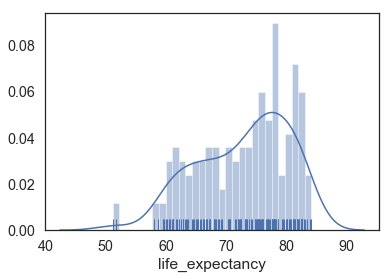

In [747]:
sns.distplot(pop_reg_2018['life_expectancy'], bins=30, rug=True)

The rug plot shows exactly where each data point is along the x-axis.

To compare distributions between categorical variables, violinplot can be used. These are mirrored KDEs.

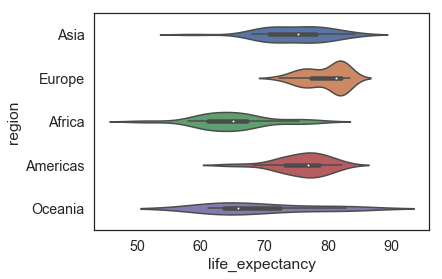

In [752]:
sns.violinplot(x='life_expectancy', y='region', data=pop_reg_2018)

The aestheics of the plot can easily be changed.

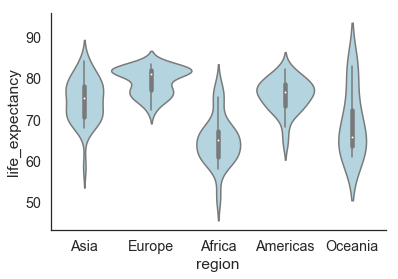

In [812]:
sns.violinplot(x='region', y='life_expectancy', data=pop_reg_2018, color='lightblue', width=1.2)
sns.despine()

We can see that some of the multimodal appearance of the original distribution plot, stems from the different lifeexpectancies in different regions. This has been revealed by using the hue variable. Exactly this workflow is common in EDA, try to dissect groups to find underlying explaining variables to why a distribution appears to consist of many small distribution (multimodal).

Continuing this, can we dissect further? This is where it is very good to be able to do grid plots/small mulples, as in `relplot`, the categorical equivalent is `catplot`.

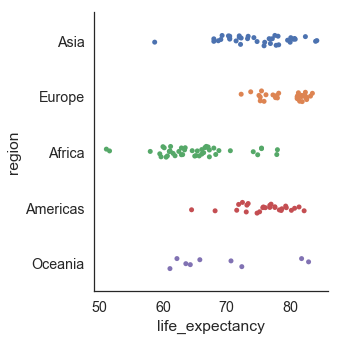

In [770]:
sns.catplot(x='life_expectancy', y='region', data=pop_reg_2018)

The default is a `stripplot` a type of categorical scatterplot where the dots are randomly jittered to not overlap. This is very fast, but it is sometimes still hard to see how many dots are in a group. A more ordered approach is to create a another type of categorical scatterplot, a so called swarmplot, where the dots are layered so that they are guaranteed not to overlap.

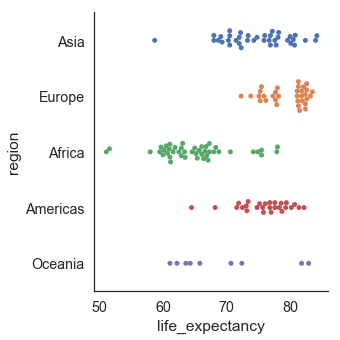

In [771]:
sns.catplot(x='life_expectancy', y='region', data=pop_reg_2018, kind='swarm')

Now it is clear where the most points are. A drawback is that this method can be slow for large datasets. For really large datasets, even stripplot is slow and it is necessary to approximate the distributions with a violinplot instead of showing each observation. Or show some distribution statistics, such as with a boxplot (more on that later).

Now we can use color to find out that differences in regions are often related to income level.

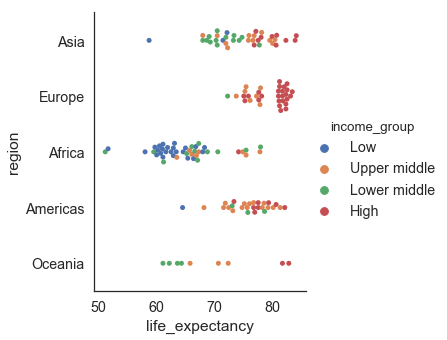

In [772]:
sns.catplot(x='life_expectancy', y='region', data=pop_reg_2018,
            hue='income_group', kind='swarm')

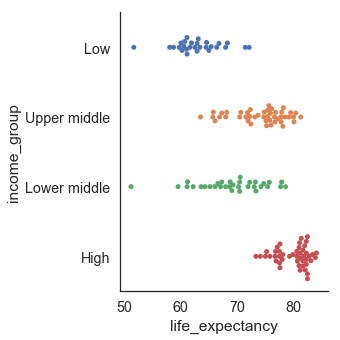

In [823]:
sns.catplot(x='life_expectancy', y='income_group', data=pop_reg_2018,
            kind='swarm')

This categorical value has an order which we expected to appear (from lowest to highest income level). We could specify this manually with the `order` parameter, but would have to do this to each seaborn plot. Instead the ordered levels of a categorical variable can be encoded using pandas.

In [827]:
# why copy settings warning here?
pop_reg_2018['income_group'] = pd.Categorical(
    pop_reg_2018['income_group'], ordered=True,
    categories=['Low', 'Lower middle', 'Upper middle', 'High'])

/home/joel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


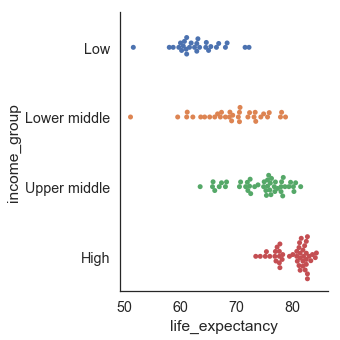

In [829]:
# Would be fun to add Gini equality vs life expectancy.
sns.catplot(x='life_expectancy', y='income_group', data=pop_reg_2018,
            kind='swarm')

The variable levels are automatically orederd and it is easy to see how life expactancy generally grow with higher average income.

One can see that the income might be more indicative.

WIth the powerful gridplots it is now easy to see how this income distribution has changed  . In contrast to a line plot with the average change over time, we can here see how the distribution itself changes, not just the average. While countries in general has increased their life execptancy, differences can be seen in how they have done it: Europe nad the Americas has gone from having countries with high and low life_expectancy levels to tighter distriutions where all countreis have high, while africa has transitioned from most countries having low life_exp through a period of very diverse life lengths depending on country.

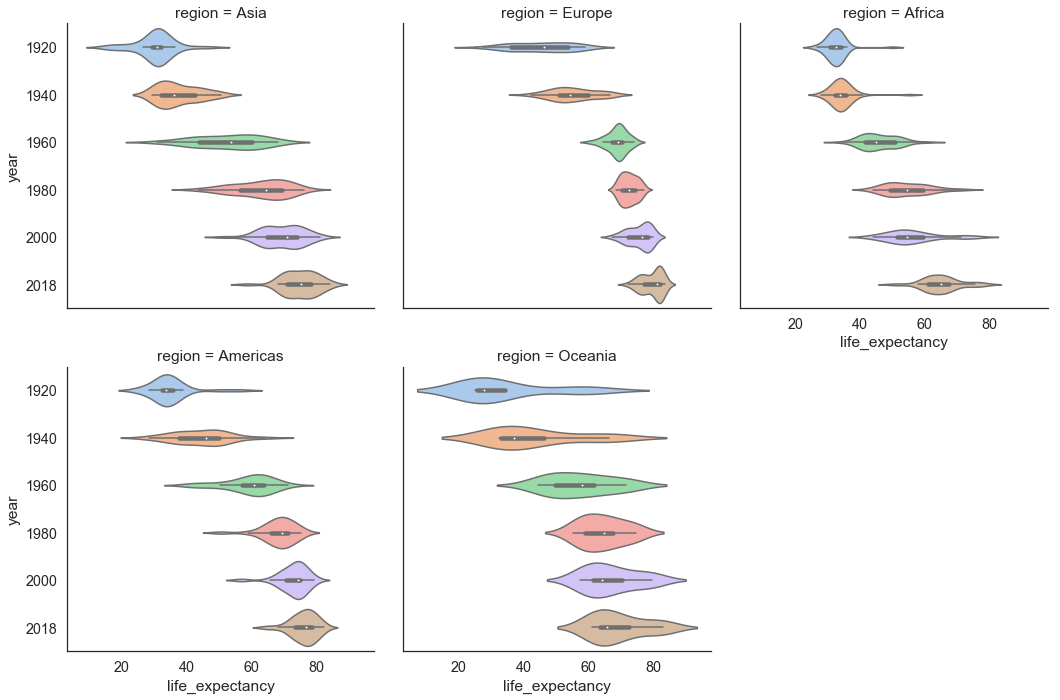

In [822]:
# If both columns can be interpretted as numerical, the orient keyword kan be added to be explicit
sns.catplot(x='life_expectancy', y='year', orient='horizontal', data=pop_mult_years, kind='violin',
            col='region', col_wrap=3, palette='pastel')

Let's see how much of the variation during the transition in African life expectancy can be explained by geogrphically close regions performing differently. First how many sub-regions are there in each Africa.

In [845]:
pop_mult_years.groupby('region')['sub-region'].nunique()

region
Africa      2
Americas    2
Asia        5
Europe      4
Oceania     4
Name: sub-region, dtype: int64

Two, what are those.

In [854]:
pop_mult_years.groupby('region')['sub-region'].unique()

region
Africa                  [Northern Africa, Sub-Saharan Africa]
Americas    [Latin America and the Caribbean, Northern Ame...
Asia        [Southern Asia, Western Asia, South-eastern As...
Europe      [Southern Europe, Western Europe, Eastern Euro...
Oceania     [Australia and New Zealand, Melanesia, Microne...
Name: sub-region, dtype: object

Let's see if sub-saharan and northern africa have had different development when it comes to life expectancy.

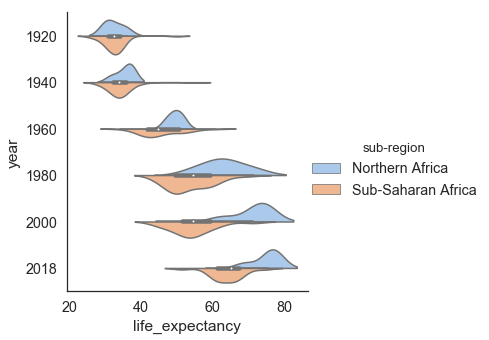

In [849]:
# The split parameter saves some space and looks slick
africa = pop_mult_years.loc[pop_mult_years['region'] == 'Africa']
sns.catplot(x='life_expectancy', y='year', orient='horizontal', data=africa, kind='violin',
            hue='sub-region', palette='pastel', split=True)

This was a great example on how mapping different variables to differnet plot elements can strip down confounding ariables and offer exlplnanations to the restuls

Now that we know `catplot`, it is very easy to create other plots such as a box plot. 

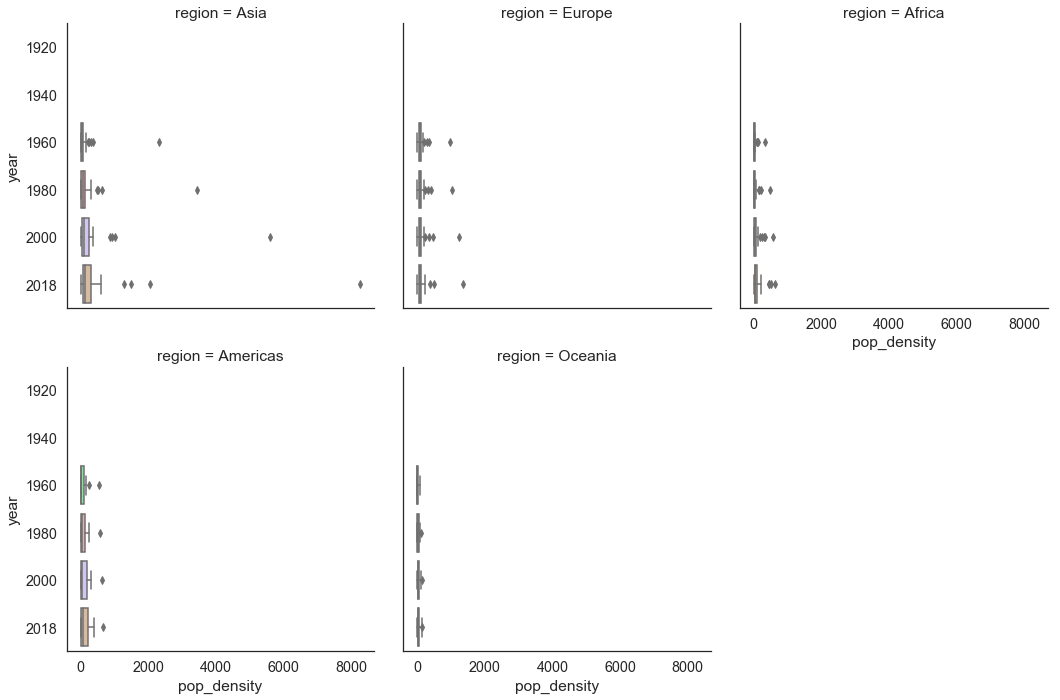

In [863]:
sns.catplot(y='year', x='pop_density', orient='horizontal', data=pop_mult_years, kind='box',
            col='region', col_wrap=3, palette='pastel')

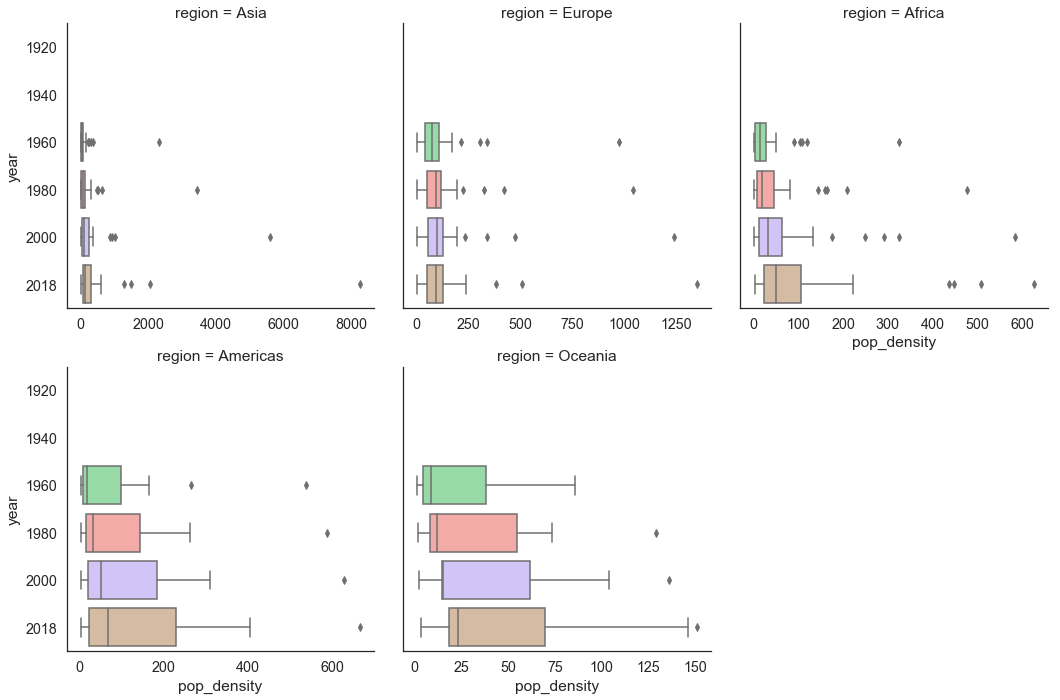

In [866]:
sns.catplot(y='year', x='pop_density', orient='horizontal', data=pop_mult_years, kind='box',
            col='region', col_wrap=3, palette='pastel', sharex=False)

The aim of a box plot is to give information about the distribution of the data by displaying a specific set of data points from the distribution, which can give more information than just displaying the mean and standard deviation. All graphical elements in a box plots correspond to actual observations from the underlying data set (in contrast to how e.g. the mean and standard deviation are caluclated statistics of a data set). The `seaborn` box plots are so-called Tukey box plots by default, which means that the graphical elements correspond to the following statistics:

- The lines of the box represent the 25th, 50th (median), and 75th quantile in the data. These divide the data into four quartiles (0-25, 25-50, 50-75, 75-100).
- The whiskers represent the furthest points within 1.5 * the interquartile range (the distance between the 25th and 75th quantile).
- The flyers mark all individual observations that are outside the whiskers, which could be referred to as "outliers" (although there are many definitions of what could constitutes an outlier).

Most of these plot elements are configurable and could be set to represent different distribution statistics.

Another useful visualization for comparing distributions is the `violinplot`. Again, the syntax is the same as before, just change the plot name.

In [873]:
# TODO somewhere mention to have the most imopratnt comparison the closes, so here time thousld be on X axis 
# so we can see the increasing trend regiht nedxt to each other.
pop_mult_years.loc[pop_mult_years.groupby(['region', 'year'])['pop_density'].idxmax().dropna()]

,country,year,population,region,sub-region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_emissions
19870.0,Mauritius,1960,660000,Africa,Sub-Saharan Africa,Upper middle,56.8,2760,6.17,103.00,325.0,0.272
19890.0,Mauritius,1980,966000,Africa,Sub-Saharan Africa,Upper middle,66.0,4470,2.67,40.20,476.0,0.611
19910.0,Mauritius,2000,1190000,Africa,Sub-Saharan Africa,Upper middle,71.5,11100,1.99,18.50,584.0,2.270
19928.0,Mauritius,2018,1270000,Africa,Sub-Saharan Africa,Upper middle,74.9,21000,1.43,13.20,625.0,NaN
2788.0,Barbados,1960,231000,Americas,Latin America and the Caribbean,High,64.5,4990,4.33,83.70,537.0,0.746
2808.0,Barbados,1980,252000,Americas,Latin America and the Caribbean,High,72.6,13100,2.00,27.20,586.0,2.680
2828.0,Barbados,2000,270000,Americas,Latin America and the Caribbean,High,74.9,14400,1.74,14.80,628.0,4.400
2846.0,Barbados,2018,286000,Americas,Latin America and the Caribbean,High,76.8,16000,1.80,11.50,666.0,NaN
27097.0,Singapore,1960,1630000,Asia,South-eastern Asia,High,66.0,4990,5.82,47.80,2330.0,0.853
27117.0,Singapore,1980,2410000,Asia,South-eastern Asia,High,71.6,20900,1.82,14.70,3450.0,13.000


many small coutnries, let's look at only above 7 millino inhabitsnats

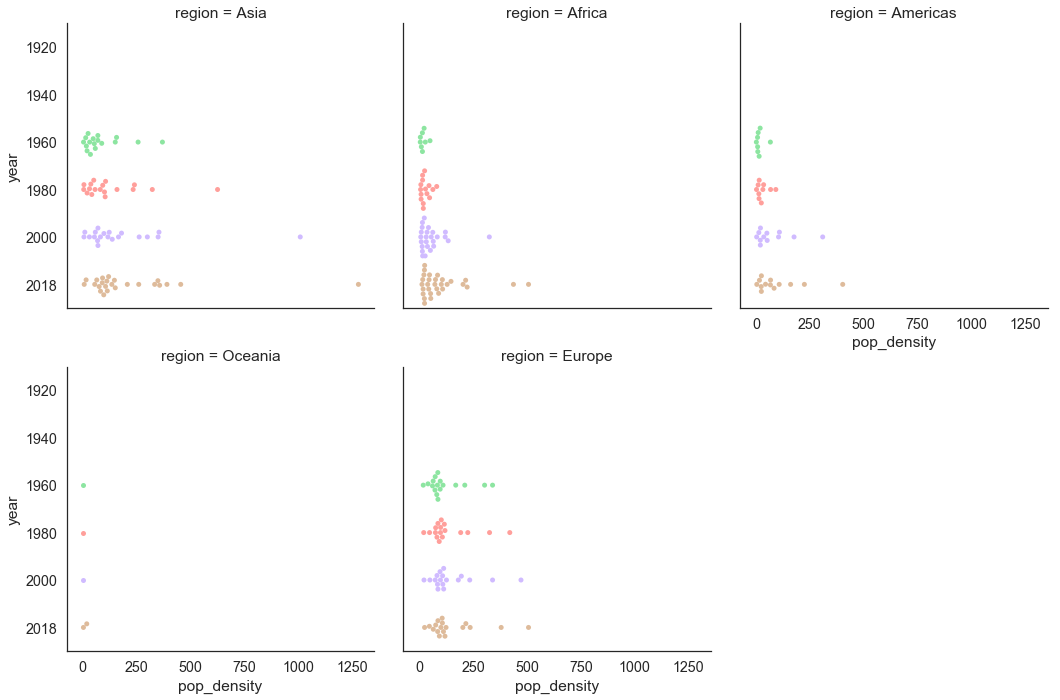

In [882]:
pop_big = pop_mult_years.loc[pop_mult_years['population'] > 7000000]
sns.catplot(y='year', x='pop_density', orient='horizontal', data=pop_big, kind='swarm',
            col='region', col_wrap=3, palette='pastel')

# Possible additons Depending on what we want

- Combining two plots by using the FacetGrid interface directly.
- Countplot on something simple in the begiinnign, e.g. coutnriees per contientt. ALso menion barplot?




# =========== END ============

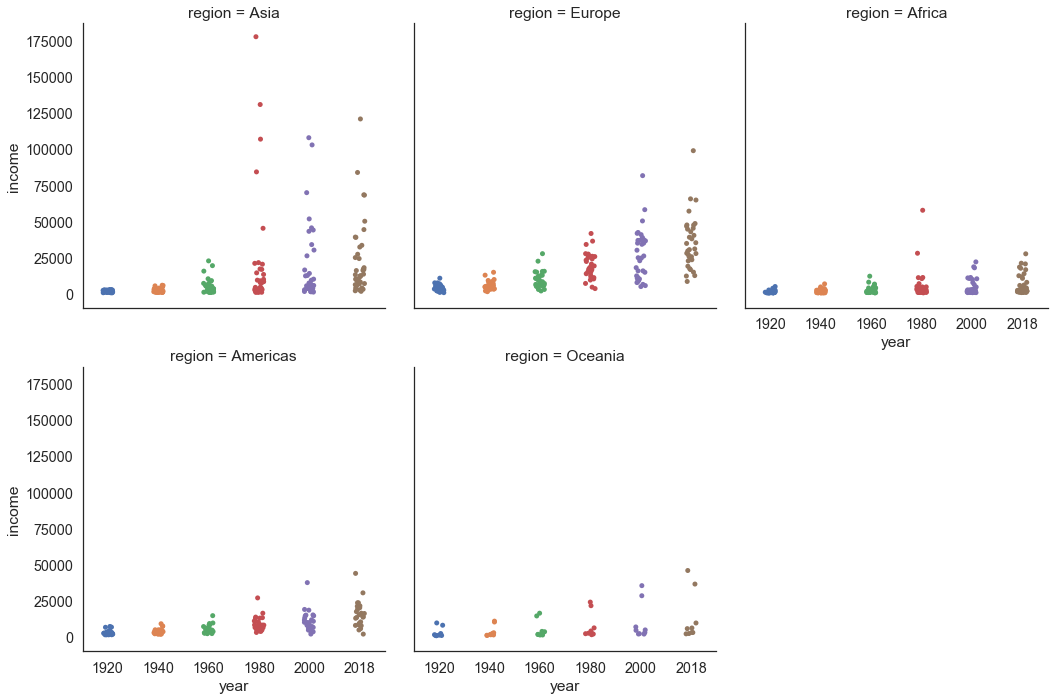

In [785]:
sns.catplot(x='year', y='income', data=pop_mult_years, kind='strip', col='region', col_wrap=3)

In [793]:
# A problem with the above is that people might want to know the name for the highest, which
# is not entirely straightforward... it is really better suited for interactive plotting.
pop_mult_years.loc[pop_mult_years.groupby(['region', 'year',])['income'].idxmax(), ['income', 'country', 'year']]

,income,country,year
27933,4830,South Africa,1920
27953,6660,South Africa,1940
17680,12000,Libya,1960
17700,57700,Libya,1980
17720,21900,Libya,2000
26717,27500,Seychelles,2018
1215,7000,Argentina,1920
5834,8880,Canada,1940
5854,14500,Canada,1960
5874,26800,Canada,1980


Default = random jitter, can see by making the plot many times. This is very fast and recommend for big dta sets. For small data set like this, we can use a more ordered appearance through swarm plots which avoids overlaps and hints at the distribution of the data.

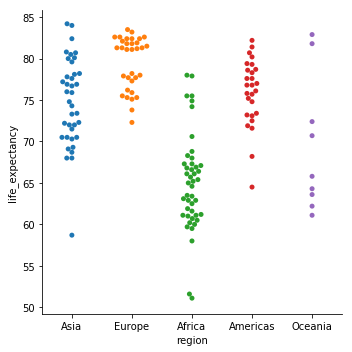

In [261]:
sns.catplot(x='region', y='life_expectancy', data=pop_reg_2018, kind='swarm')

To find out which those observation are with the higheset and lowest life expectancy, use gourpby.

In [262]:
pop_reg_2018.nsmallest(10, 'life_expectancy')

# Somewhat convoluted ways to get the 5 smallest per region (with country name)
# pop_reg_2018.set_index('country').groupby(['region'])['life_expectancy'].nsmallest(5)
# pop_reg_2018.groupby(['region']).apply(lambda x: x.nsmallest(5, 'life_expectancy'))

,country,year,population,region,sub-region,income_group,life_expectancy
17738,Lesotho,2018,2260000,Africa,Sub-Saharan Africa,Lower middle,51.1
6350,Central African Republic,2018,4740000,Africa,Sub-Saharan Africa,Low,51.6
28469,Somalia,2018,15200000,Africa,Sub-Saharan Africa,Low,58.0
218,Afghanistan,2018,36400000,Asia,Southern Asia,Low,58.7
33725,Zambia,2018,17600000,Africa,Sub-Saharan Africa,Lower middle,59.5
13139,Guinea-Bissau,2018,1910000,Africa,Sub-Saharan Africa,Low,59.7
27593,Sierra Leone,2018,7720000,Africa,Sub-Saharan Africa,Low,60.0
33944,Zimbabwe,2018,16900000,Africa,Sub-Saharan Africa,Low,60.2
6569,Chad,2018,15400000,Africa,Sub-Saharan Africa,Low,60.5
28907,South Sudan,2018,12900000,Africa,Sub-Saharan Africa,Low,60.7


In [263]:
pop_reg_2018.nlargest(10, 'life_expectancy')

,country,year,population,region,sub-region,income_group,life_expectancy
15986,Japan,2018,127000000,Asia,Eastern Asia,High,84.2
27812,Singapore,2018,5790000,Asia,South-eastern Asia,High,84.0
30221,Switzerland,2018,8540000,Europe,Western Europe,High,83.5
29126,Spain,2018,46400000,Europe,Southern Europe,High,83.2
1970,Australia,2018,24800000,Oceania,Australia and New Zealand,High,82.9
11168,France,2018,65200000,Europe,Western Europe,High,82.6
14234,Iceland,2018,338000,Europe,Northern Europe,High,82.6
15548,Italy,2018,59300000,Europe,Southern Europe,High,82.6
15329,Israel,2018,8450000,Asia,Western Asia,High,82.4
18614,Luxembourg,2018,590000,Europe,Western Europe,High,82.4


Seems like income group matters more than the continent, explore this.

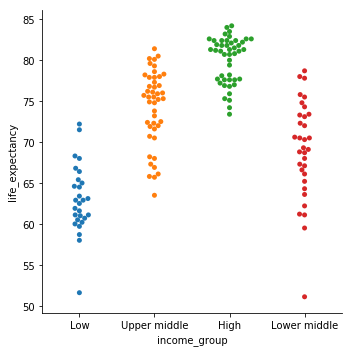

In [265]:
sns.catplot(x='income_group', y='life_expectancy', data=pop_reg_2018, kind='swarm')

This categorical value has an order and it is helpful to encode this information for the sorting on the x-axis.

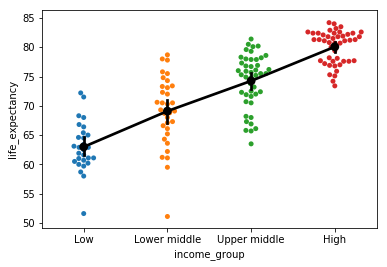

In [275]:
# Maybe get into pointplot later since it requires zorder.
sns.swarmplot(x='income_group', y='life_expectancy', data=pop_reg_2018, order=ord_cat, zorder=-100)
sns.pointplot(x='income_group', y='life_expectancy', data=pop_reg_2018, order=ord_cat, color='black')

Maybe we want to see if this relationship appear to be similar in similar countries.

Clearly see how different types of countries are distributed across the countries.

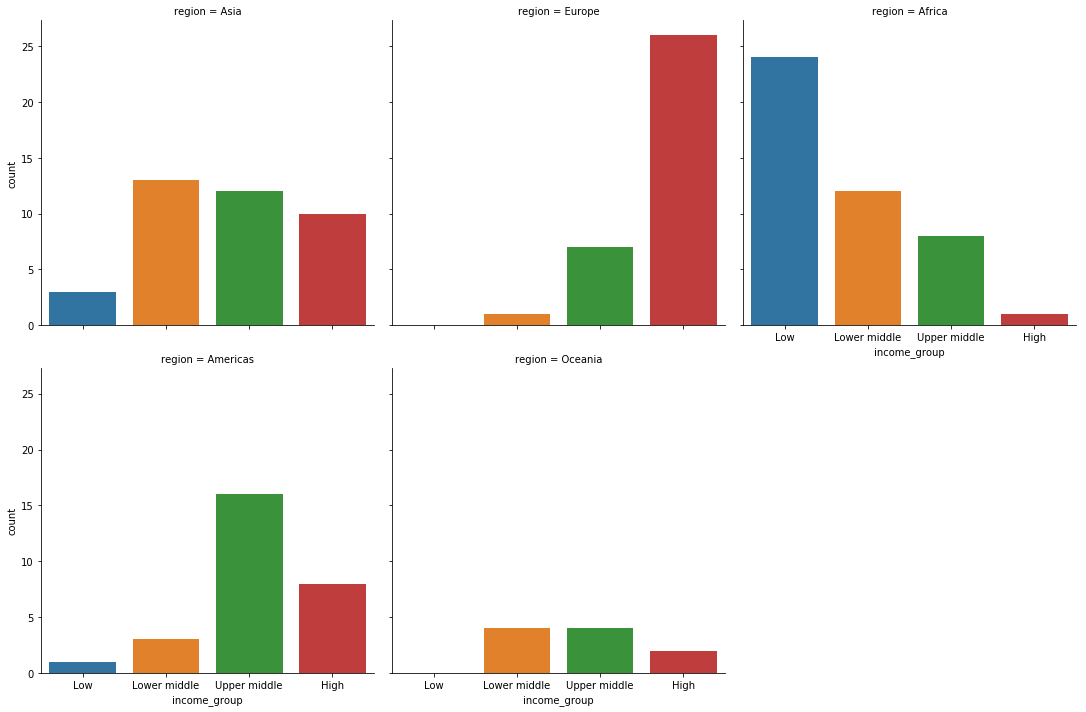

In [281]:
sns.catplot(x='income_group', col='region',
            data=pop_reg_2018, kind='count', order=ord_cat, col_wrap=3)

That was about how long life, what about how affordable life? Although countries here are classified according to their income level, this takes into accoutn income in an internaitonal sense, how much buying power to people have in US dollars. A way of knowing how affordable a life in the country is is to instead adjust based on the prices of local things in the country. One way of doing this is PPP adjusted GDP/capita which takes into account a basket of goods. The big mac index is a type of PPP.

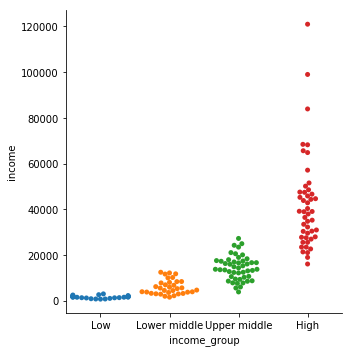

In [290]:
sns.catplot(x='income_group', y='income', data=pop_reg_2018, kind='swarm', order=ord_cat)

In [298]:
pop_reg_2018.groupby('income_group')['income'].agg(['min', 'max'])

,min,max
income_group,,
Low,629,2920
Lower middle,1490,12400
Upper middle,3780,27200
High,16000,121000


Naturally, these measures are correlated, but it is also clear that countries within these classifications overlap significantly. At most, the purchasing power might be up to around threee times higher in a country of a lower income group.

Only from this data we could not say what causes what, but from other studies it has been shown that that increased welfare (income), leads to incrased security (less child deaths, longer lives), which in turn lowers the amount of children born. #TODO link rosling video

See some of the interesting relationships from above over time.

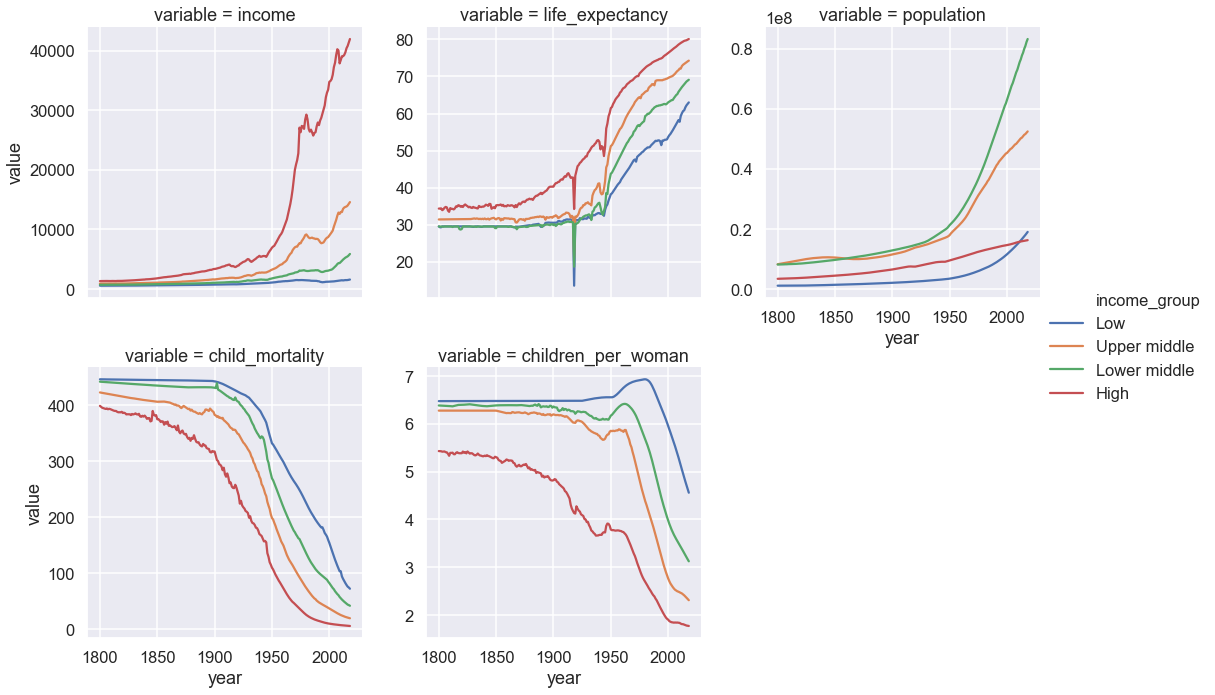

In [530]:
# TODO can do this indiviusally first in lec 3 and then hav ethis good example of how it is better to melt
pop_reg_sub = pop_regions.melt(id_vars=['year', 'income_group'],
                               value_vars=['income', 'life_expectancy', 'population',
                                           'child_mortality', 'children_per_woman'])
# gridlines can be helpful for comparison, maybe just set style as above and then set it back
with sns.axes_style('darkgrid'):
    g = sns.relplot(x='year', y='value', col='variable', data=pop_reg_sub, kind='line', ci=None,
            facet_kws={'sharey':False}, col_wrap=3, hue='income_group')
# g.axes  grid(axis='y')

Ending population growth starts with saving poor children
https://www.gapminder.org/answers/will-saving-poor-children-lead-to-overpopulation/

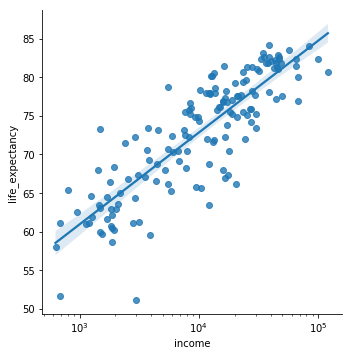

In [365]:
# move this to the last lecture? Also include shortly how to get coef, sstatsmodels or scikit learn
g = sns.lmplot(x='income', y='life_expectancy', logx=True, data=pop_reg_2018, truncate=True)
g.ax.set_xscale('log')

region
Oceania       40309800
Europe       509517501
Americas     640162300
Africa      1111807200
Asia        4222471000
Name: population, dtype: int64

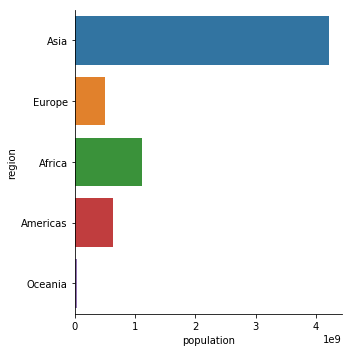

In [137]:
import seaborn as sns

pop_reg_2018 = pop_regions.query('year == 2018')
sns.catplot(x='population', y='region', data=pop_reg_2018, kind='bar', estimator=sum, ci=None)
pop_reg_2018.groupby('region')['population'].sum().sort_values()

sub-region
Northern America                     2503430000
Central Asia                         4050379000
Northern Europe                      4947909400
Northern Africa                     12531764000
Western Asia                        12654291100
Eastern Europe                      18386210000
Southern Europe                     19132141954
Western Europe                      26944851830
South-eastern Asia                  31840056500
Latin America and the Caribbean     33602259000
Sub-Saharan Africa                  39421554800
Southern Asia                      115255516200
Eastern Asia                       147267758000
Name: population, dtype: int64

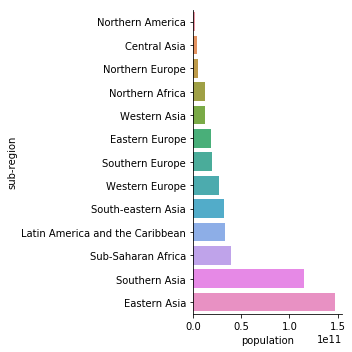

In [138]:
pop_regions = pop_regions.loc[pop_regions['region'] != 'Oceania']
pop_per_subregion = pop_regions.groupby('sub-region')['population'].sum().sort_values()
sns.catplot(x='population', y='sub-region', data=pop_regions, kind='bar', estimator=sum, ci=None, order=pop_per_subregion.index)
pop_per_subregion

In [883]:
pop_regions.to_csv('../data/world-data-gapminder.csv', index=False)